# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

- $B = \begin{bmatrix} b_{11} & b_{12} & ... & b_{1n} \\ b_{21} & b_{22} & ... & b_{2n} \\ ...& & & \\  b_{m1} & b_{m2} & ... & b_{mn} \end{bmatrix} $ (size $m$ x $n$)

$X = [x_1, ..., x_m]$ (of size $1$ x $m$)


$AX \begin{bmatrix} b_{11} & b_{12} & ... & b_{1n} \\ b_{21} & b_{22} & ... & b_{2n} \\ ...& & & \\  b_{m1} & b_{m2} & ... & b_{mn} \end{bmatrix} = A [x_1, ..., x_m] \begin{bmatrix} b_{11} & b_{12} & ... & b_{1n} \\ b_{21} & b_{22} & ... & b_{2n} \\ ...& & & \\  b_{m1} & b_{m2} & ... & b_{mn} \end{bmatrix} $

Consider the k-th column of AXB:

$AXb_k = A \sum_{i=1}^m x_i b_{i,k} = [b_{k1}A, b_{k2}A, ..., b_{km}A] \begin{bmatrix} x_{1}  \\ x_{2} \\ . \\ .\\.\\ x_{m} \end{bmatrix} = [[b_{k1}, b_{k2}, ..., b_{km}]\otimes A ] \begin{bmatrix} x_{1}  \\ x_{2} \\ . \\ .\\.\\ x_{m} \end{bmatrix} $ , where $[b_{k1}, b_{k2}, ..., b_{km}]$ is $b^T_{k}$


$\mathrm{vec}(AXB) = \begin{bmatrix} \mathrm{vec}(AXB)_{1}  \\ \mathrm{vec}(AXB)_{2} \\ . \\ .\\.\\ \mathrm{vec}(AXB)_{n} \end{bmatrix}  =\begin{bmatrix} b^T_{1} \otimes A \\ b^T_{2} \otimes A\\ . \\ .\\.\\ b^T_{n}\otimes A \end{bmatrix} vec(X) = (B^T \otimes A) vec(X) $

for rowwise: $\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X)$

- the complexity of a naive computation is $O(n^2 m^2)$, if matrix A the same size $n\times m$ as matrix B

or $O(kcnm)$ if matrix A has the size $k \times c$

if matricies A and B $n \times n$ and $x$ is $n \times 1$, complexity is $O(n^4)$

- $ (A\otimes I + I \otimes B)(x \otimes y)  = Ax \otimes y + x \otimes By = \lambda_{A} x \otimes y + x \otimes \lambda_{B}y = (\lambda_{A} + \lambda_{B})(x \otimes y) $

$\Rightarrow $for Kronecker sum each eigenvalue of matrix B are sum with eigenvalues of A, i.e. $\lambda_{1B} + \lambda_{1A}, \lambda_{1B} + \lambda_{2A}, ... \lambda_{1B} + \lambda_{nA}; \lambda_{2B} + \lambda_{1A}, \lambda_{2B} + \lambda_{2A}, ... \lambda_{2B} + \lambda_{nA}; ...$

- - Richardson iteration with the optimal choice of parameter 

$\tau_{opt}= \frac{2}{\lambda_{min}+\lambda_{max}} = 0.002$

$e_k = x_k - x_* $

$e_k \leq q^k e_0$

$e_0 = x_0 - x_* $

take $x_0 = 0$, then $e_0 = \|x_*\|_2$

$10^{-4} \leq q^k e_0$

$k = \log_q 10^{-4}  - \log_q e_0 $

$q = \frac{\lambda_{max}-\lambda_{min}}{\lambda_{max}+\lambda_{min}} = 0.999998$

$k \approx 4605165 - \log_q e_0 $

- - Chebyshev iteration

$e_{k+1} \leq C q^{k} e_0$

$q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1} = 0.9980$

similarly, take $x_0 = 0$, then $e_0 = \|x_*\|_2$

$e_k \leq C q^{k-1} e_0$

$\log{e_k} \leq \log{C} +  \log{q^{k-1}} + \log{e_0}$

$\log{e_k} - \log{C} - \log{e_0} \leq \log{q^{k-1}}$

$k \approx 4601 - \log_q {C} - \log_q {e_0}$

- - Conjugate gradient method

$\frac{10^{-4}}{e_0} \leq  \gamma (\frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1})^{k}$

from http://www.mat.uniroma2.it/~tvmsscho/Rome-Moscow_School/2012/files/T120910_.pdf :

$ k \leq \frac{1}{2} \sqrt{\frac{\lambda_{n}}{\lambda_{1}}}(\log{2} - \log{\frac{e_k}{e_0} })$

$ k \approx 2000$




## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

- https://math.stackexchange.com/questions/2320236/projection-on-the-hyperplane-h-sum-x-i-0

$\lambda = 0$, then $L v_1 = 0$

for matrix $L = D - A$ eigenvector, corresponding to the eigenvalue  0, is $v_1 = (1, 1, ...,1)^T$ (because if we sum rows of $L$ we will obtain zero)

the orthogonal projection $p(\vec{x}) = \vec{x} -  \frac{\vec{x} \vec{n}}{\|\vec{n}\|^2} \vec{n} $

then $p(\vec{x}) \perp \vec{n}$ for all $\vec{x}$

$p(\vec{x}) = \vec{x}$ if $\vec{x} \perp \vec{n}$

then the matrix $P = \begin{pmatrix}
  1 - 1/n & - 1/n & ... & - 1/n\\
  - 1/n & 1 - 1/n & ... & - 1/n\\
  ... & ... & ... & ... &\\
  - 1/n & ... & ... & 1 - 1/n
\end{pmatrix} = I - \frac{\mathbb{1}}{n}$


In [228]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
import numpy as np
import networkx as nx
from numpy import linalg

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    eigs = np.array([])

    #G = nx.from_numpy_matrix(A)
    #print(np.shape(A))
    G = nx.from_scipy_sparse_matrix(A)
    #print(np.shape(G))
    L = nx.laplacian_matrix(G).toarray()
    
    
    P = np.eye(np.shape(L)[0]) - np.ones(np.shape(L)[0])/np.shape(L)[0]
    
    i = 0
    j = 0
    
    
    while i < num_iter_fix:
        x = P@x
        x = x/np.linalg.norm(x)
        
        h2 = np.eye(np.shape(L)[0], np.shape(L)[1])
        h1 = L - shift*h2
        h = np.linalg.inv(h1)@x
        u = np.linalg.norm(h)
        x = h/u
        x = x.T
        
        x1 = L@x
        
        x2 = x.T@x1
        
        m = x2/(x.T @ x)
        
        if (np.linalg.norm(shift - m)/np.linalg.norm(shift)) <= eps:
             i = num_iter_fix
        else:
            i+=1
    
    eigenvalue = ((x.T)@L@x)/(x.T @ x)
    eigs = np.append(eigs, eigenvalue)
    
    while j < num_iter_adapt:
        #x = np.reshape(np.shape(x)[0], 1)
        #x = P@x
        #x = x/np.linalg.norm(x)
        
        #x = (np.linalg.inv(L - eigs[j]@np.eye(np.eye(np.shape(L)[0], np.shape(L)[1]))@x)/np.linalg.norm(np.linalg.inv(L - eigs[j]@np.eye(np.eye(np.shape(L)[0], np.shape(L)[1])))@x))
        #x = P@x
        #x = x/np.linalg.norm(x)
        
        #print(np.shape(L))
        h2 = np.eye(np.shape(L)[0], np.shape(L)[1])
        h1 = L - eigs[j]*h2
        h = np.linalg.inv(h1)@x
        u = np.linalg.norm(h)
        x = h/u
             
        x = x.T
        
        eigenvalue = ((x.T)@L@x)/(x.T @ x)
        eigs = np.append(eigs, eigenvalue)
        
        if np.linalg.norm(eigs[j] - eigs[j-1])/ np.linalg.norm(eigs[j]) <= eps:
            j = num_iter_adapt
        else:
            j+=1
        
    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [240]:
import scipy
import scipy.sparse as csr_matrix
from numpy import linalg as LA

n = 15
AA = nx.lollipop_graph(n, n)
A = nx.adjacency_matrix(AA)

shift = 1e-4
eps = 10e-4
num_iter_fix = 1000
num_iter_adapt = 1000
x0 = np.random.randint(0, n**n, n*2)


x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)

In [241]:
x

array([-0.15199078, -0.15199078, -0.15199078, -0.15199078, -0.15199078,
       -0.15199078, -0.15199078, -0.15199078, -0.15199078, -0.15199078,
       -0.15199078, -0.15199078, -0.15199078, -0.15199078, -0.14934903,
       -0.10976871, -0.0682805 , -0.0256055 ,  0.01751454,  0.06033016,
        0.10209718,  0.14208966,  0.17961248,  0.21401345,  0.24469466,
        0.27112284,  0.29283864,  0.30946461,  0.32071178,  0.32638467])

In [242]:
eigs

array([0.01738098, 0.01738098])

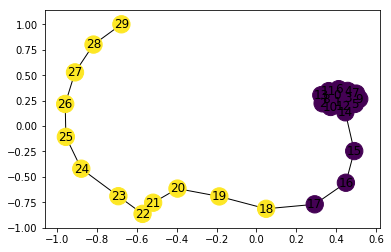

In [243]:
nx.draw_networkx(AA, node_color = np.sign(x))

In [256]:
l = 15
AAl = nx.lollipop_graph(l, l)
Al = nx.adjacency_matrix(AAl)

shiftl = 1e-4
epsl = 10e-4
num_iter_fixl = 0
num_iter_adaptl = 1000
x0l = np.random.randint(0, l**l, l*2)


xl, eigsl = partition(Al, shiftl, num_iter_fixl, num_iter_adaptl, x0l, epsl)

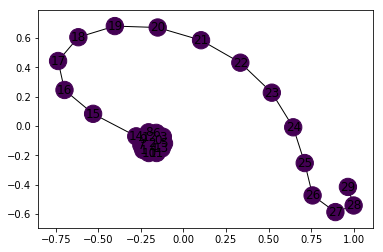

In [257]:
nx.draw_networkx(AAl, node_color = np.sign(xl))

Without "shift" we don't have the first cycle, we do not do orthogonal projection, therefore, we can converge to the eigenvalue = 0 and its vector

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

- theorem 3.10 from http://math.uchicago.edu/~may/REU2013/REUPapers/Marsden.pdf :

"G has k connected components iff its adjacency matrix can be block diagonal with k blocks iff its Laplacian matrix has k blocks.

Let devide $L$ into blocks $L_1, L_2, ..., L_k$

then $det(xI - L) = det(xI - L_1)det(xI - L_2)...det(xI - L_k)$, so the algebraic multiplicity of 0 for the entire Laplacian matrix is the sum of the algebraic multiplicity of 0 of each $L_i$. 

If G has k connected components then this sum is 1 + ··· + 1 $k$ times, so k. For the other direction, if the algebraic multiplicity of the Laplacian is k then the sum is k so there must be k blocks in the Laplacian, and so G must have k connected components. "





### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

In [2]:
# Your solution is here

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

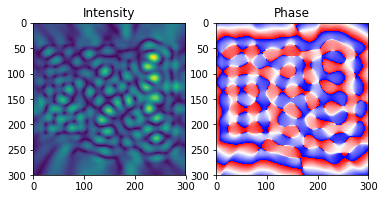

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
   G_{\overline{i_1 j_1}, \overline{i_2 j_2} } = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$G_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$



See https://github.com/oseledets/nla2018/blob/master/lectures/lecture-15.ipynb for the recipe.

For the kernel array, there is a following element correspondence with BTTB matrix G:

$$eG_{i_1-i_2, j_1 - j_2} \equiv np.roll(np.roll( G_{\overline{i_1 j_1}, \overline{i_2 j_2} }    ,-N, axis=1),-N, axis=0)$$


### Tasks:

1. (5 pts) Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. (5 pts) Write function `Gx` that calculates matvec of $T$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. Hint: matvex with a delta function in pl

3. (3 pts) What is the complexity of one matvec? 
4. (2 pts) Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. (15 pts) Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.g. `numpy.fft`


### 1. Kernel (5 pts)

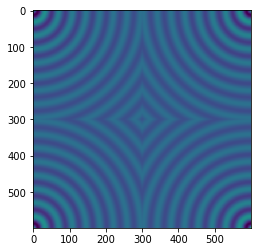

In [285]:
k0 = 50.0
N = 300
import numpy as np
from scipy.special import hankel2

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    #ij = []
    #for i in range(0, N-1):
        #for j in range(0, N-1):
            #ij.append(i - j)
    i = np.arange(-N, N-1, 1)
    j = np.arange(-N, N-1, 1)
    
    ii, jj = np.meshgrid(i, j)
         
    h = 1/(N-1)
    delta_r = h*np.sqrt(ii**2 + jj**2)
    
    s = -complex(0, 1)/4
    
    G = s*hankel2(0., k0*delta_r)
    
    eG = np.roll(np.roll(G, -N, axis = 1), -N, axis = 0) 
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [286]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    
    n, m = np.shape(eG)
    matvec = [0]
    
    #matvec = np.fft.ifft(np.fft.fft(eG) * np.fft.fft(x))
    
    
    #http://www.public.iastate.edu/~mervyn/stat580/Notes/s09matrix.pdf
    
    for i in range(n):
        for j in range(m):
            matvec.append(matvec[i] + eG[i][j]@x[j])
    
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64

    return matvec

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is ... It can be shown...

### 4. LinearOperator (2 pts)

In [291]:
from scipy.sparse.linalg import LinearOperator

def mv(x):
    return Gx(x, eG)

L_Gx = LinearOperator((N, N), matvec = mv, dtype = np.complex64)

### 5. Reconstruction (15pts)

In [ ]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 

mask = #some_solver(, , , callback = callback)

plt.figure()
plt.imshow( normalize(mask) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')